In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

from sklearn.preprocessing import OneHotEncoder

STYLE = "#ffffff"

%load_ext autoreload
%autoreload 2

from deepSculpt.sculptor import Sculptor
from deepSculpt.plotter import Plotter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
void_dim = 48 # greenyellow, chartreuse, mediumpurple, orange, crimson, turquoise, gold

sculptor = Sculptor(void_dim = void_dim,
                    n_edge_elements = 0,
                    n_plane_elements = 8,
                    n_volume_elements = 15,
                    color_edges = "dimgrey",
                    color_planes = "snow",
                    color_volumes = ["crimson", "turquoise", "gold", "greenyellow","mediumpurple"],
                    element_edge_min= int(void_dim*0.8),
                    element_edge_max = int(void_dim*0.9),
                    element_grid_min = int(void_dim*0.9),
                    element_grid_max = int(void_dim*0.95),
                    element_plane_min = int(void_dim*0.4),
                    element_plane_max = int(void_dim*0.8),
                    element_volume_min = int(void_dim*0.2),
                    element_volume_max = int(void_dim*0.5),
                    step = 1,
                    verbose = False)

sculpture = sculptor.generative_sculpt()[1]

# sculptor.plot_sculpture()

Time for sculptures is 0.026137590408325195 sec


AttributeError: 'Plotter' object has no attribute 'generative_sculpt'

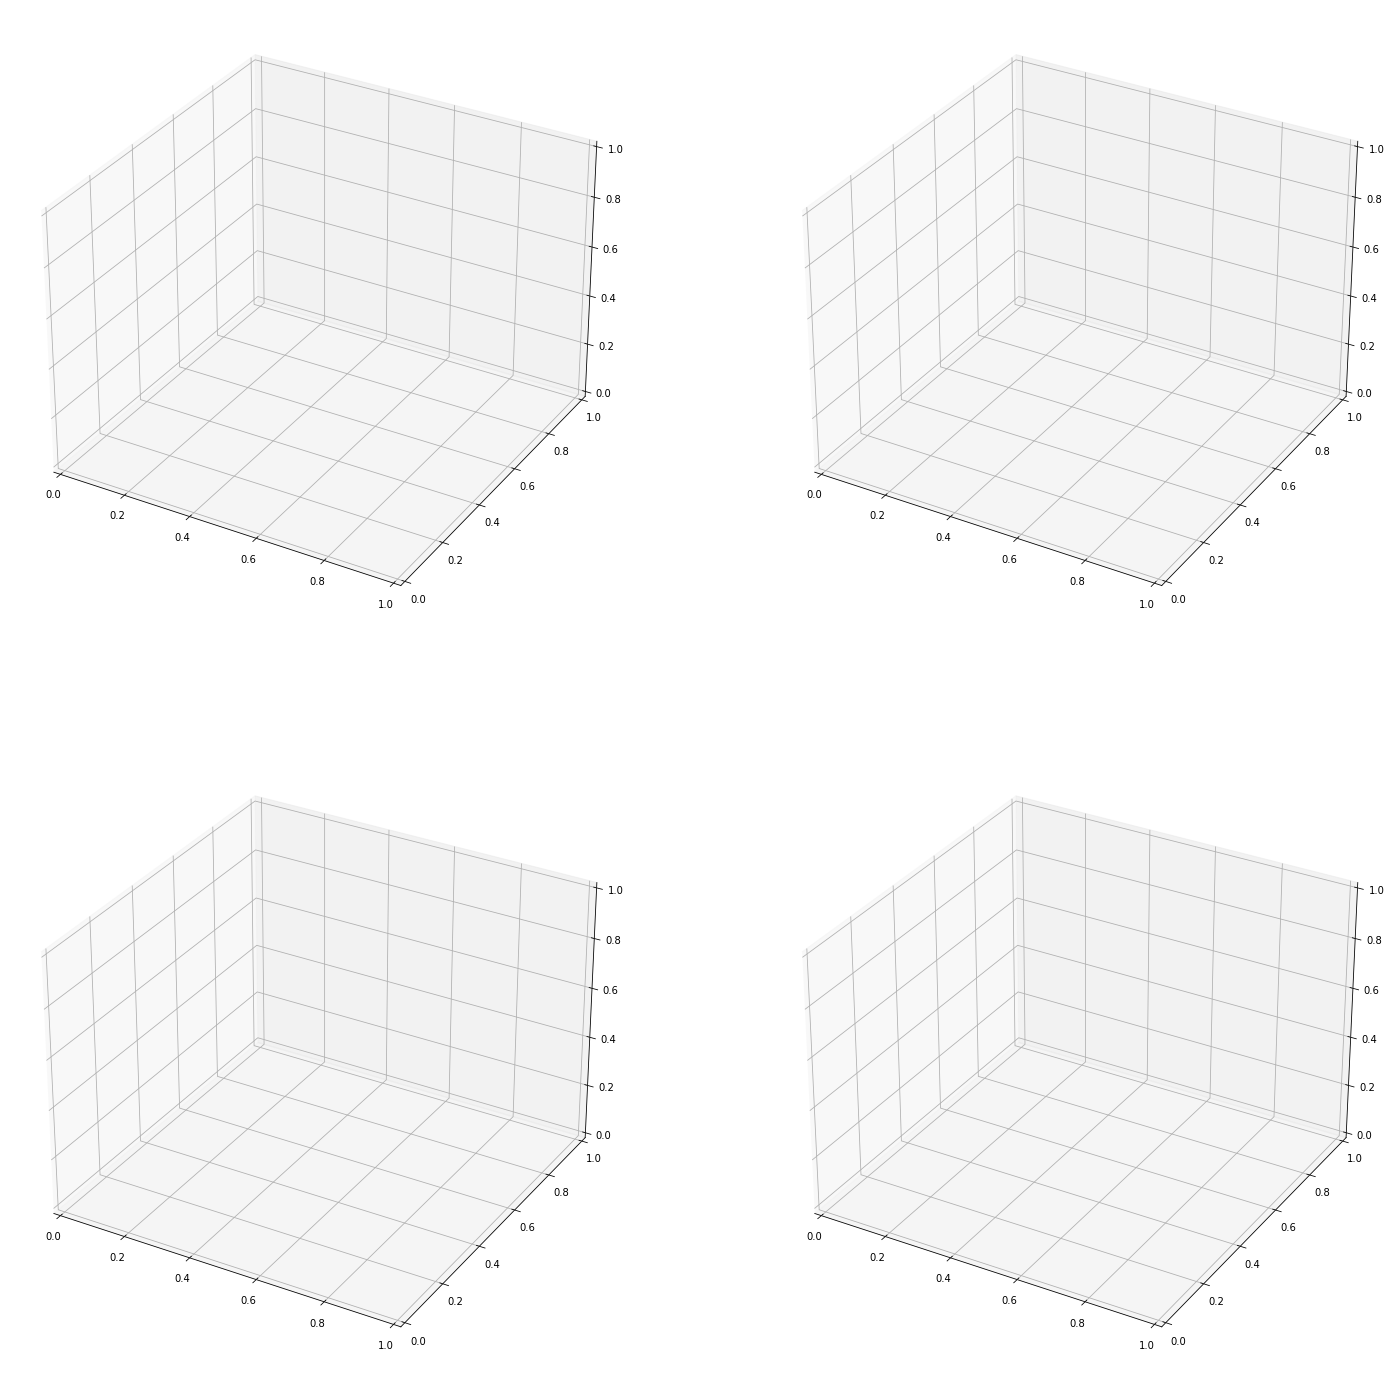

In [21]:
plotter = Plotter(sculpture[0], 48, "#ffffff")

plotter.plot_sculpture()

In [64]:
from sklearn.preprocessing import LabelEncoder

def encoder(colors_array):

    binarizer = LabelEncoder()

    colors = binarizer.fit_transform(colors_array.reshape(-1, 1))

    binary_encoded = np.array( [[int(char) for char in "{:03b}".format(color)] for color in colors] , dtype=object).reshape((48*3,48,48))

    classes = binarizer.classes_

    return binary_encoded, classes

def decoder(binary_array, classes, void_dim):
    
    dic_color = {'000':classes[0],'001':classes[1],'010':classes[2],'011':classes[3],'100':classes[4],'101':classes[5],"110":classes[6],"111":classes[7]}

    dic_void = {'000':1,'001':1,'010':1,'011':1,'100':1,'101':0,"110":0,"111":0}

    decoded_color = np.array([dic_color[key] for key in [''.join([str(num) for num in vector]) for vector in [i[0] for i in binary_array.reshape(void_dim*void_dim*void_dim,1,3).tolist()]]]).reshape((void_dim,void_dim,void_dim))

    decoded_void = np.array([dic_void[key] for key in [''.join([str(num) for num in vector]) for vector in [i[0] for i in binary_array.reshape(void_dim*void_dim*void_dim,1,3).tolist()]]]).reshape((void_dim,void_dim,void_dim))
    
    return decoded_void, decoded_color

In [65]:
encoded_output = encoder(sculpture)

In [66]:
sculpture = encoded_output[0] # pass the color array

In [67]:
sculpture.shape

(144, 48, 48)

In [68]:
classes = encoded_output[1]

In [69]:
decoded_output = decoder(sculpture, classes, void_dim) # returns decoded void and decoded color

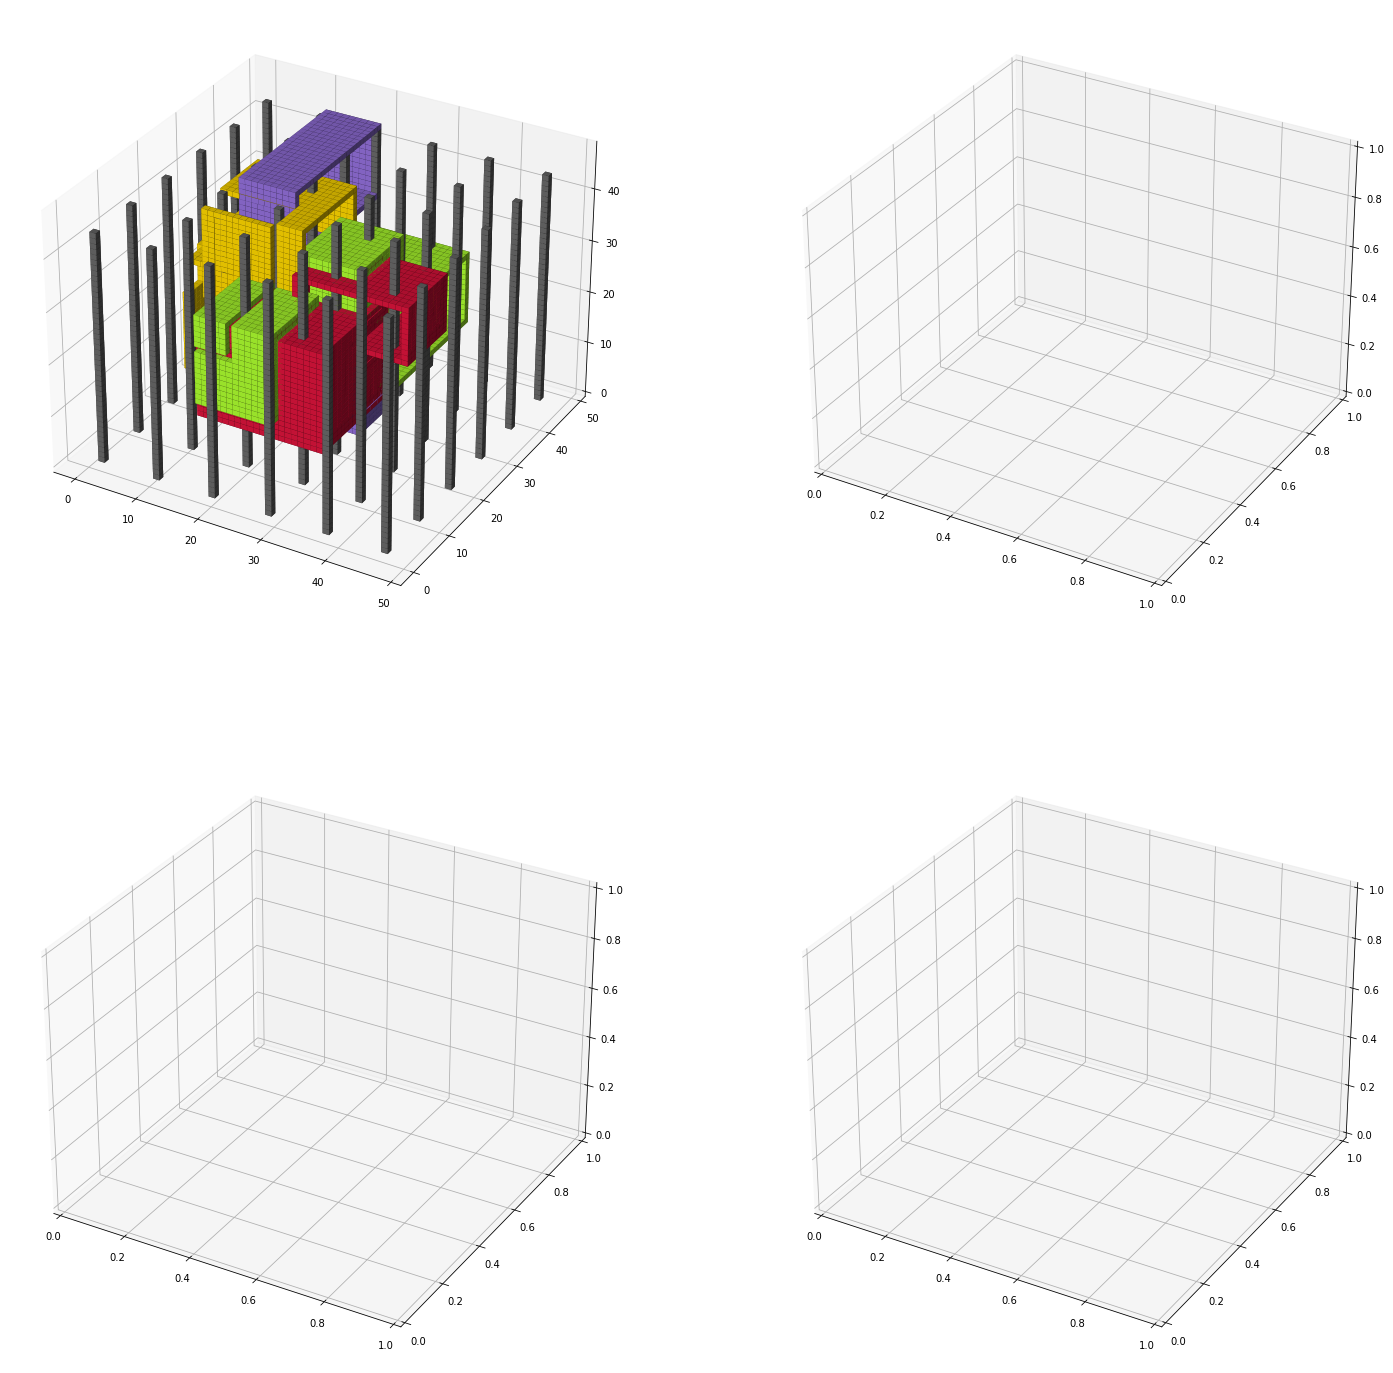

In [70]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(25, 25), facecolor = (STYLE), subplot_kw=dict(projection="3d"))
axes = axes.ravel() # flats
for index in range(1):
    axes[index].voxels(decoded_output[0], facecolors=decoded_output[1], edgecolors="k", linewidth=0.05)

In [71]:
plt.savefig('image.png')

<Figure size 432x288 with 0 Axes>